In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


In [2]:
real_mf_50 = sio.loadmat('data/mfwno_poissons_n50.mat')['real_mf'] 
output_mf_wno_50 = sio.loadmat('data/mfwno_poissons_n50.mat')['output_mf'] 
output_hf_wno_50 = sio.loadmat('data/mfwno_poissons_n50.mat')['output_hf'] 
output_mf_deeponet_50 = sio.loadmat('data/deeponet_poissons_n50.mat')['out_actual'] 
x_coords = sio.loadmat('data/mfwno_poissons_n50.mat')['x_coords'][0]


In [3]:
case = [10, 20, 30, 50]
for n in case:
    output_mf_deeponet = sio.loadmat('data/deeponet_poissons_n' + str(n) + '.mat')['out_actual'] 

    error = (output_mf_deeponet - real_mf_50)**2
    error_mean = np.mean(error)
    error_std = np.std(error)

    print('Case-{}, MSE: mean-{:0.6f}, std-{:0.6f}'.format(str(n), error_mean, error_std))


Case-10, MSE: mean-0.002042, std-0.003391
Case-20, MSE: mean-0.001956, std-0.003396
Case-30, MSE: mean-0.001905, std-0.003218
Case-50, MSE: mean-0.001695, std-0.002892


In [4]:
print(real_mf_50.shape, output_mf_wno_50.shape, output_hf_wno_50.shape, output_mf_deeponet_50.shape)


(2000, 100) (2000, 100) (2000, 100) (2000, 100)


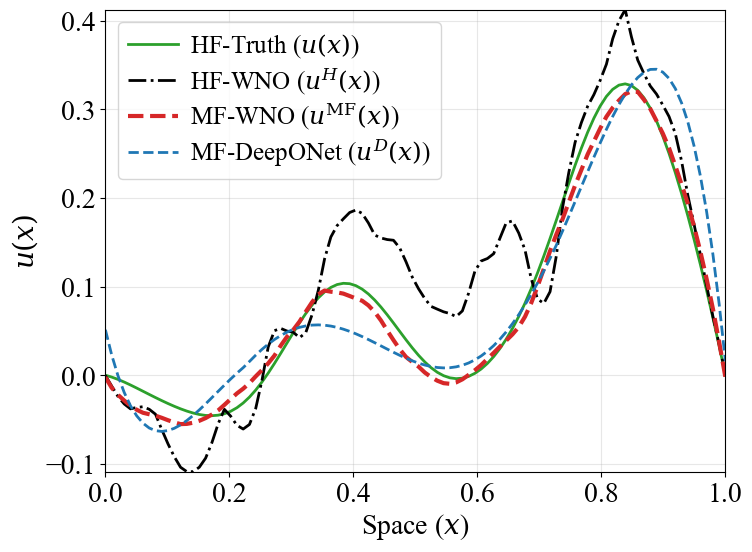

In [5]:
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams['font.size'] = 20
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig6, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=100)

n0 = 50
axs.plot(x_coords,real_mf_50[n0], linestyle='-', color='tab:green', lw=2, label='HF-Truth ($u(x)$)')
axs.plot(x_coords,output_hf_wno_50[n0], linestyle='-.', color='black', lw=2, label='HF-WNO ($u^{H}(x)$)')
axs.plot(x_coords,output_mf_wno_50[n0], linestyle='--', color='tab:red', lw=3, label='MF-WNO ($u^{'r'\mathrm{MF}}(x)$)')
axs.plot(x_coords,output_mf_deeponet_50[n0], linestyle='--', color='tab:blue', lw=2, label='MF-DeepONet ($u^{D}(x)$)')
axs.legend(labelspacing=0.2, columnspacing=0.4, handletextpad=0.5, ncol=1, loc=2, fontsize=18)
axs.margins(0)
axs.grid(True, alpha=0.3)
axs.set_ylabel('$u(x)$')
axs.set_xlabel('Space ($x$)')
plt.show()

fig6.savefig('pred_poisson.pdf', format='pdf', dpi=600, bbox_inches='tight')
